# Decision Trees with Python

In [1]:
# load packages
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [55]:
# read in data
df = pd.read_csv('/Users/brianwimmer/anly-501-project-brianwimmer-gu/data/March_2020_VA_Flights.csv')

In [56]:
# Data Cleaning
# remove unnecessary columns
df = df.drop(['ACTUAL_ELAPSED_TIME', 'FL_DATE', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'DEST_CITY_NAME', 'DEST_STATE_ABR'], axis=1)

# filter out only IAD flights
df = df[df['ORIGIN'] == "IAD"]

# filter out only legacy carrier flights (UA, DL, AA)
carriers = ["UA","DL", "AA"]
df = df[df["OP_CARRIER"].isin(carriers)]

# dummy variables
df = pd.get_dummies(df)

In [58]:
# INSERT CODE TO EXPLORE THE LOAD BALANCE AND COUNT THE NUMBER OF 
# SAMPLES FOR EACH TARGET (THEN PRINT THE RESULT)

print('Number of points with cancelled=0: ', len(df[df['CANCELLED']==0]), len(df[df['CANCELLED']==0]) / len(df))
print('Number of points with cancelled=1: ', len(df[df['CANCELLED']==1]), len(df[df['CANCELLED']==1]) / len(df))

Number of points with cancelled=0:  2258 0.7764786795048143
Number of points with cancelled=1:  650 0.2235213204951857


In [59]:
# make Data Frames where y is the target (CANCELLED)
X = df.drop('CANCELLED', axis = 1)
Y = df['CANCELLED']

In [60]:
# PARTITION THE DATASET INTO TRAINING AND TEST SETS
from sklearn.model_selection import train_test_split
test_ratio = 0.2
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = test_ratio, random_state= 0)

In [61]:
# PRINT THE TYPE AND SHAPE OF x_train, x_test, y_train, y_test
print(type(x_train), x_train.shape)
print(type(x_test), x_test.shape)
print(type(y_train), y_train.shape)
print(type(y_test), y_test.shape)

<class 'pandas.core.frame.DataFrame'> (2326, 52)
<class 'pandas.core.frame.DataFrame'> (582, 52)
<class 'pandas.core.series.Series'> (2326,)
<class 'pandas.core.series.Series'> (582,)


In [62]:
# CODE TO TRAIN A SKLEARN DECISION TREE MODEL ON x_train,y_train 
from sklearn import tree
model = tree.DecisionTreeClassifier()
model = model.fit(x_train, y_train)

(53, 53)


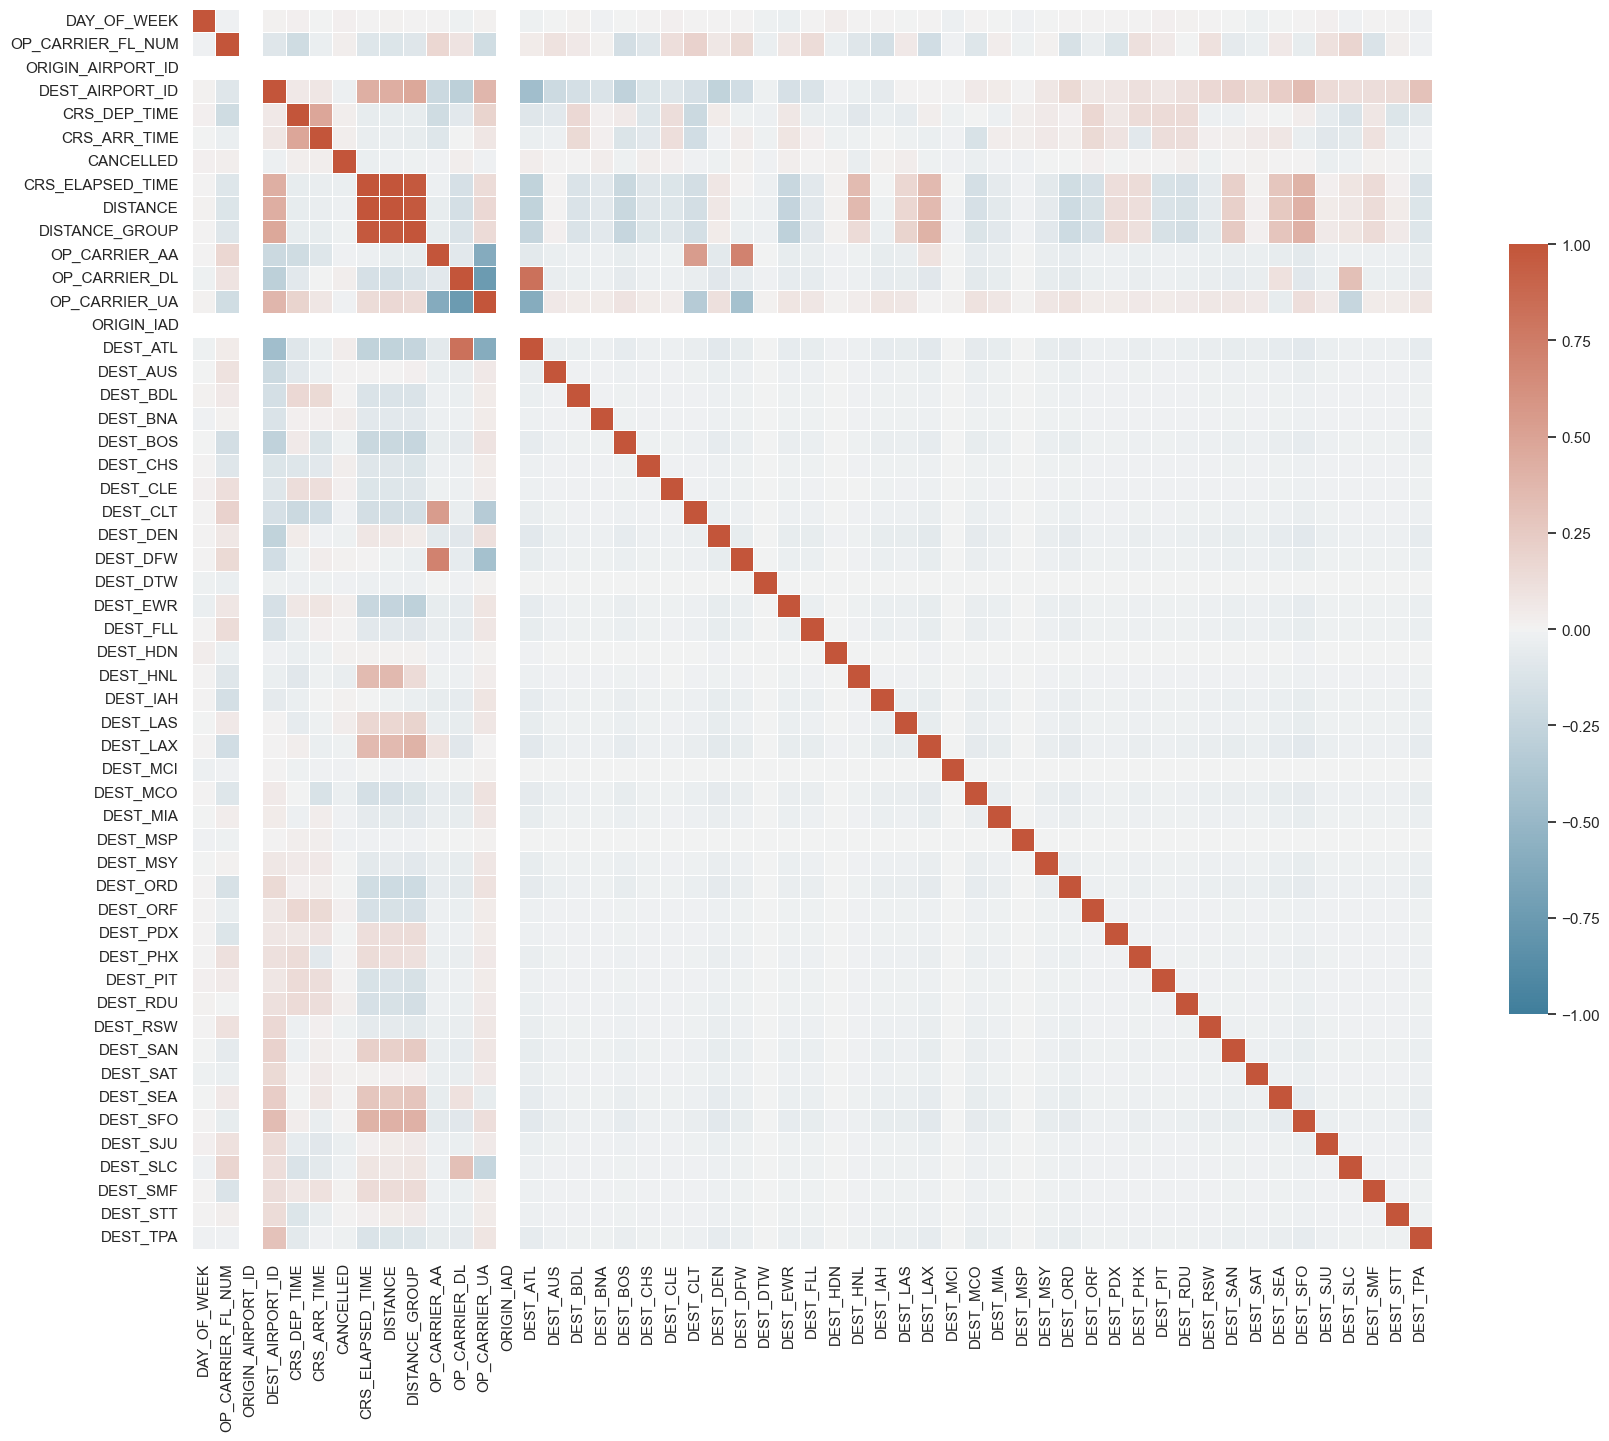

In [63]:
# HEAT-MAP FOR THE CORRELATION MATRIX
corr = df.corr();  #print(corr)					#COMPUTE CORRELATION OF FEATER MATRIX
print(corr.shape)
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(20, 20))  # Set up the matplotlib figure
cmap = sns.diverging_palette(230, 20, as_cmap=True) 	# Generate a custom diverging colormap
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, vmin=-1, vmax=1, center=0,
        square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show();

In [64]:
# CODE TO USE THE MODEL TO MAKE PREDICTIONS FOR THE TRAINING AND TEST SET 
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

In [65]:
# CODE TO WRITE A FUNCTION def confusion_plot(y_data,y_pred) WHICH GENERATES
# A CONFUSION MATRIX PLOT 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

def confusion_plot(y_data, y_pred):
    print('ACCURACY: ', accuracy_score(y_data, y_pred))
    print('NEGATIVE RECALL (Y=0): ', recall_score(y_data, y_pred, pos_label=0))
    print('NEGATIVE PRECISION (Y=0): ', precision_score(y_data, y_pred, pos_label=0))
    print('POSITIVE RECALL (Y=1): ', recall_score(y_data, y_pred, pos_label=1))
    print('POSITIVE PRECISION (Y=1): ', precision_score(y_data, y_pred, pos_label=1))
    print(confusion_matrix(y_data, y_pred))
    ConfusionMatrixDisplay.from_predictions(y_data, y_pred)
    plt.show()

------TRAINING------
ACCURACY:  0.8426483233018057
NEGATIVE RECALL (Y=0):  0.9883398112159911
NEGATIVE PRECISION (Y=0):  0.8376470588235294
POSITIVE RECALL (Y=1):  0.34285714285714286
POSITIVE PRECISION (Y=1):  0.8955223880597015
[[1780   21]
 [ 345  180]]


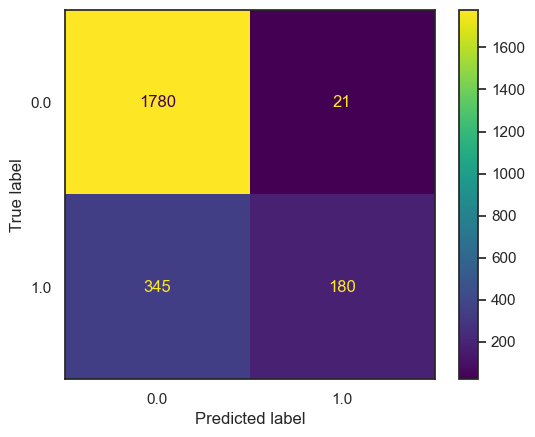

------TEST------
ACCURACY:  0.718213058419244
NEGATIVE RECALL (Y=0):  0.888402625820569
NEGATIVE PRECISION (Y=0):  0.7822736030828517
POSITIVE RECALL (Y=1):  0.096
POSITIVE PRECISION (Y=1):  0.19047619047619047
[[406  51]
 [113  12]]


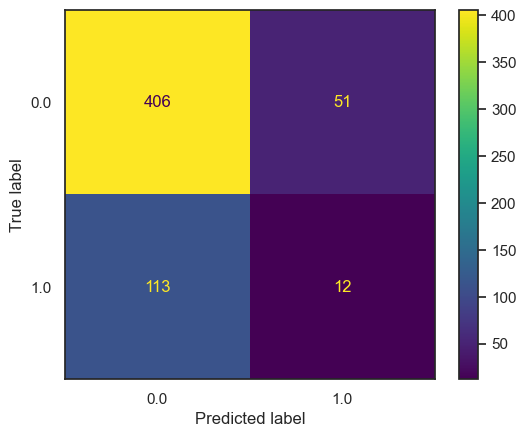

In [66]:
# CODE TO TEST YOUR confusion_plot FUNCTION 
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)

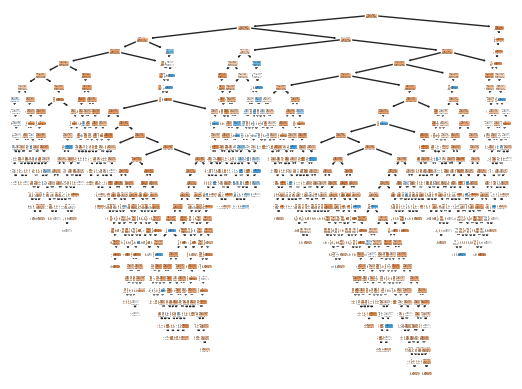

In [67]:
# visualize the tree
from sklearn import tree

def plot_tree(model, X, Y):
    tree.plot_tree(model, filled=True)

plot_tree(model, X, Y)

In [68]:
# LOOP OVER POSSIBLE HYPER-PARAMETERS VALUES
test_results=[]
train_results=[]

for num_layer in range(1,20):
    model = tree.DecisionTreeClassifier(max_depth = num_layer)
    model = model.fit(x_train, y_train)

    yp_train=model.predict(x_train)
    yp_test=model.predict(x_test)

    # print(y_pred.shape)
    test_results.append([num_layer,accuracy_score(y_test, yp_test),recall_score(y_test, yp_test,pos_label=0),
                        recall_score(y_test, yp_test,pos_label=1)])
    train_results.append([num_layer,accuracy_score(y_train, yp_train),recall_score(y_train, yp_train,pos_label=0),
                        recall_score(y_train, yp_train,pos_label=1)])

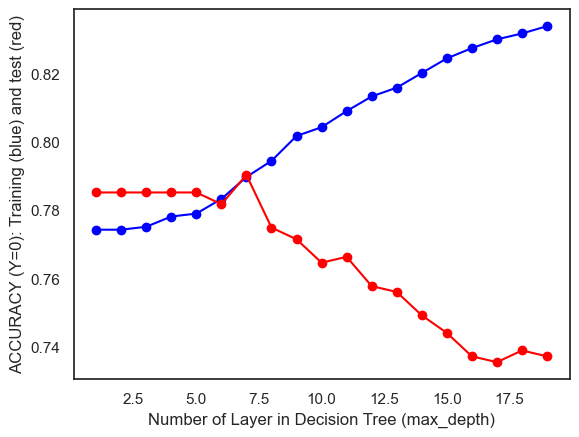

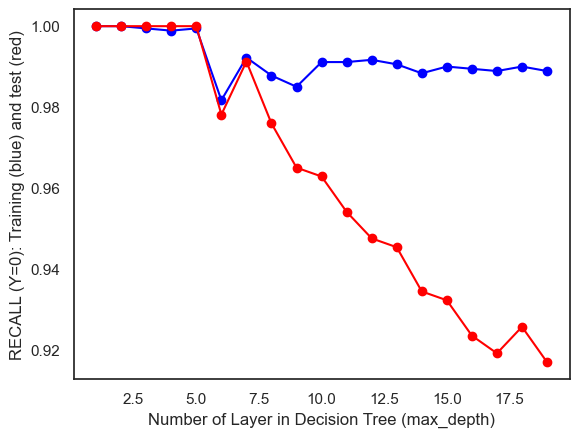

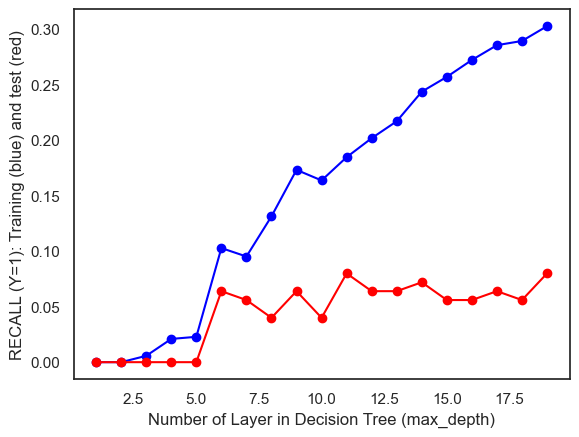

In [69]:
# hyper-tuning plots

train_results_df = pd.DataFrame(train_results)
test_results_df = pd.DataFrame(test_results)

plt.plot(train_results_df[0], train_results_df[1], marker='o', markerfacecolor='blue', color='blue')
plt.plot(test_results_df[0], test_results_df[1], marker='o', markerfacecolor='red', color='red')
plt.xlabel('Number of Layer in Decision Tree (max_depth)')
plt.ylabel('ACCURACY (Y=0): Training (blue) and test (red)')
plt.show()

plt.plot(train_results_df[0], train_results_df[2], marker='o', markerfacecolor='blue', color='blue')
plt.plot(test_results_df[0], test_results_df[2], marker='o', markerfacecolor='red', color='red')
plt.xlabel('Number of Layer in Decision Tree (max_depth)')
plt.ylabel('RECALL (Y=0): Training (blue) and test (red)')
plt.show()

plt.plot(train_results_df[0], train_results_df[3], marker='o', markerfacecolor='blue', color='blue')
plt.plot(test_results_df[0], test_results_df[3], marker='o', markerfacecolor='red', color='red')
plt.xlabel('Number of Layer in Decision Tree (max_depth)')
plt.ylabel('RECALL (Y=1): Training (blue) and test (red)')
plt.show()

In [70]:
# CODE BELOW TO TRAIN A SKLEARN DECISION TREE MODEL ON x_train,y_train using hyper-parameter
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=num_layer)
model = model.fit(x_train, y_train)

yp_train=model.predict(x_train)
yp_test=model.predict(x_test)

------TRAINING------
ACCURACY:  0.8340498710232158
NEGATIVE RECALL (Y=0):  0.9888950583009439
NEGATIVE PRECISION (Y=0):  0.8295295761527713
POSITIVE RECALL (Y=1):  0.3028571428571429
POSITIVE PRECISION (Y=1):  0.888268156424581
[[1781   20]
 [ 366  159]]


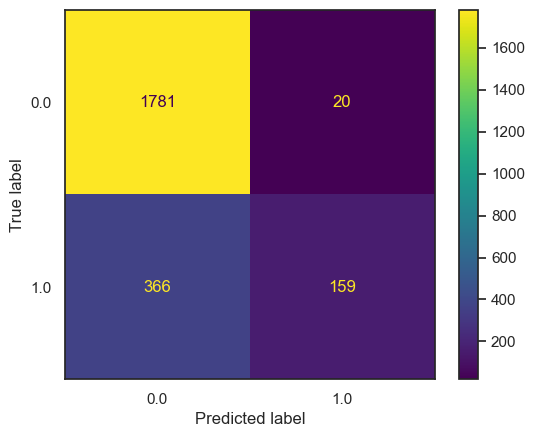

------TEST------
ACCURACY:  0.7353951890034365
NEGATIVE RECALL (Y=0):  0.9168490153172867
NEGATIVE PRECISION (Y=0):  0.7831775700934579
POSITIVE RECALL (Y=1):  0.072
POSITIVE PRECISION (Y=1):  0.19148936170212766
[[419  38]
 [116   9]]


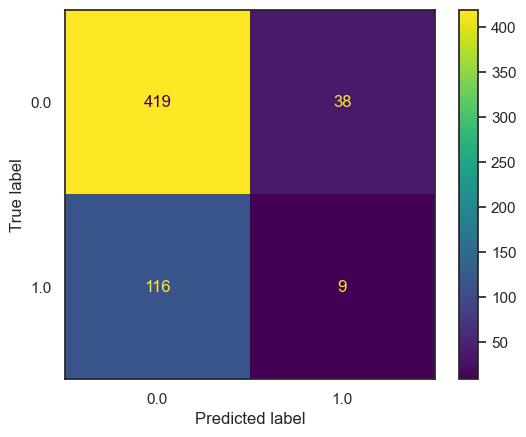

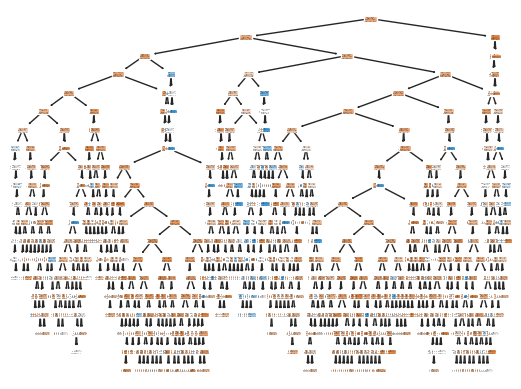

In [71]:
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)

plot_tree(model,X,Y)